In [ ]:
# Dataset source: https://github.com/ifood/ifood-data-business-analyst-test

import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
import seaborn as sns

print('All libraries are imported.')

All libraries are imported.


In [ ]:
# import the dataset
raw_df = pd.read_csv("ml_project1_data.csv")
raw_df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


# Data Cleaning and First Descriptive Analysis

In [ ]:
# check the data types for all columns
raw_df.dtypes

ID                       int64
Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Complain                 int64
Z_CostContact            int64
Z_Revenue                int64
Response                 int64
dtype: object

## List of variables by type

###Categorical Variables

- Education: customer's level of education
- Marital_Status: customer's marital status
- AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, o otherwise
- AcceptedCmp2: 1 if customer accepted the offer in the 2nt campaign, o otherwise
- AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, o otherwise
- AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, o otherwise
- AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, o otherwise
- Response: 1 if customer accepted the offer in the last campaign, 0 otherwise
- Complain: 1 if customer complained in the last 2 years

###Quantitative Variables

- ID: customer's ID
- Year_Birth: customer's year of birth
- Income: customer's yearly household income
- Kidhome: number of small children in customer's household
- Teenhome: number of teenagers in customer's household
- Dt_Customer: date of customer's enrollment with the company
- Recency: number of days since the last purchase
- MntWines: amount spent on wines in the last 2 years
- MntFruits: amount spent on fruits in the last 2 years
- MntMeatProducts: amount spent on meat products in the last 2 years
- MntFishProducts: amount spent on fish products in the last 2 years
- MntSweetProducts: amount spent on sweet products in the last 2 years
- MntGoldProds: amount spent on gold products in the last 2 years
- NumDealsPurchases: made of purchases made through company's web site
- NumWebPurchases: made of purchases made with discount
- NumCatalogPurchases: made of purchases made using catalogue
- NumStorePurchases: made of purchases directly in stores
- NumWebVisitsMonth: number of visits to company's web site in the last month

###Need a deeper analysis to understand, see bellow

- Z_CostContact            int64
- Z_Revenue                int64

In [ ]:
# set Dt_Customer from object to datetime
raw_df['Dt_Customer'] = raw_df['Dt_Customer'].astype('datetime64')
raw_df.dtypes

ID                              int64
Year_Birth                      int64
Education                      object
Marital_Status                 object
Income                        float64
Kidhome                         int64
Teenhome                        int64
Dt_Customer            datetime64[ns]
Recency                         int64
MntWines                        int64
MntFruits                       int64
MntMeatProducts                 int64
MntFishProducts                 int64
MntSweetProducts                int64
MntGoldProds                    int64
NumDealsPurchases               int64
NumWebPurchases                 int64
NumCatalogPurchases             int64
NumStorePurchases               int64
NumWebVisitsMonth               int64
AcceptedCmp3                    int64
AcceptedCmp4                    int64
AcceptedCmp5                    int64
AcceptedCmp1                    int64
AcceptedCmp2                    int64
Complain                        int64
Z_CostContac

Two variables not show any description: Z_CostContact and Z_Revenue. We need to understand this variables and verify your relevance for the analysis.

In [ ]:
print("Z_CostContact\n")
print(raw_df.Z_CostContact.describe())

print("\nZ_Revenue\n")
print(raw_df.Z_Revenue.describe())

Z_CostContact

count    2240.0
mean        3.0
std         0.0
min         3.0
25%         3.0
50%         3.0
75%         3.0
max         3.0
Name: Z_CostContact, dtype: float64

Z_Revenue

count    2240.0
mean       11.0
std         0.0
min        11.0
25%        11.0
50%        11.0
75%        11.0
max        11.0
Name: Z_Revenue, dtype: float64


Both variables not have any missing values and have only a contant value for all rows (3 for Z_CostContact and 11 to Z_Revenue), so they not contribute to the analysis and can be droped.

In [ ]:
#Check for missing values
raw_df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

The Income variable has 24 missing values. A good guess would be to replace the missing values with the mean.

In [ ]:
raw_df['Income'].fillna(raw_df['Income'].mean(), inplace = True)
raw_df.isnull().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

In [ ]:
raw_df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,4.084821,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25037.797168,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,2.778714,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35538.750000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51741.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68289.750000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [ ]:
raw_df['Complain'].value_counts(normalize=True) * 100

0    99.0625
1     0.9375
Name: Complain, dtype: float64

Checking the descriptive statistics of the dataset, we see that the Complain variable has a mean bellow 0,01. When we count the single values (0 and 1), we have that less than 1% of the entries in the variable correspond to 1. So this feature not contribute to the analysis and can be droped.

# Analysing the data and a Deeper Statistical Analysis

We will focus this part of the analysis in some key features: Income, Total Spend, Total of Purchases and age, relating the other variables to these.

First, we need to understand two categorical variables (Marital Status and Education) and create some support variables.

In [ ]:
# Understanding Marital Status
print(raw_df['Marital_Status'].unique())
print("\n",raw_df['Marital_Status'].value_counts(normalize=True)*100)

['Single' 'Together' 'Married' 'Divorced' 'Widow' 'Alone' 'Absurd' 'YOLO']

 Married     38.571429
Together    25.892857
Single      21.428571
Divorced    10.357143
Widow        3.437500
Alone        0.133929
YOLO         0.089286
Absurd       0.089286
Name: Marital_Status, dtype: float64


In [ ]:
# Understanding Education Level
print(raw_df['Education'].unique())
print("\n",raw_df['Education'].value_counts(normalize=True)*100)

['Graduation' 'PhD' 'Master' 'Basic' '2n Cycle']

 Graduation    50.312500
PhD           21.696429
Master        16.517857
2n Cycle       9.062500
Basic          2.410714
Name: Education, dtype: float64


The majority of the customers are Single or in some type of relationship, so we need to coalesce this categories in two: Single and Together.

The majority of the customer are undergraduated or post-graduated (88,5%), so we will coalesce this feature in four levels (Graduation, Post Graduation, Basic and 2n Cycle) to simplify the analysis.

In [ ]:
# Handling marital status in two categories: Relationship and Alone
# to analyse if the customer are in some relationship
raw_df['relationship'] = raw_df['Marital_Status']
raw_df['relationship'] = raw_df['relationship'].replace({'Single':False, 'Absurd':False,'YOLO':False, 'Widow':False, 'Divorced':False, 'Alone':False})
raw_df['relationship'] = raw_df['relationship'].replace({'Together':True, 'Married':True})

# Handling Education in four categories: Basic, 2n Cycle, Graduation and Post Graduate
raw_df['education_level'] = raw_df['Education']
raw_df['education_level'] = raw_df['education_level'].replace({'PhD':'Post Graduate', 'Master':'Post Graduate'})

# Manipulating Kidhome and Teenhome to find out if the customer is a parent
raw_df['is_parent'] = raw_df['Kidhome'] + raw_df['Teenhome'] !=0

# Creating suport variables to analyse the total of purchases
raw_df['purchases']= raw_df['NumDealsPurchases'] + raw_df['NumWebPurchases'] + raw_df['NumCatalogPurchases'] + raw_df['NumStorePurchases']

# Creating suport variables to analyse the total of spend
raw_df['spend'] = raw_df['MntWines'] + raw_df['MntFruits'] + raw_df['MntMeatProducts'] + raw_df['MntFishProducts'] + raw_df['MntSweetProducts'] + raw_df['MntGoldProds']

# Creating suport variable age to replace Year of Birth
# Let's consider as the final year the max value in Dt_Customer: 2014
raw_df['age'] = (max(raw_df['Dt_Customer'].dt.year)) - raw_df["Year_Birth"]

In [ ]:
# Checking the customer acceptance to the offers in the campaigns
print("Acceptance in the 1st Campaign\n",raw_df['AcceptedCmp1'].value_counts(normalize=True) * 100)
print("\nAcceptance in the 2nd Campaign\n",raw_df['AcceptedCmp2'].value_counts(normalize=True) * 100)
print("\nAcceptance in the 3rd Campaign\n",raw_df['AcceptedCmp3'].value_counts(normalize=True) * 100)
print("\nAcceptance in the 4nd Campaign\n",raw_df['AcceptedCmp4'].value_counts(normalize=True) * 100)
print("\nAcceptance in the 5nd Campaign\n",raw_df['AcceptedCmp5'].value_counts(normalize=True) * 100)

Acceptance in the 1st Campaign
 0    93.571429
1     6.428571
Name: AcceptedCmp1, dtype: float64

Acceptance in the 2nd Campaign
 0    98.660714
1     1.339286
Name: AcceptedCmp2, dtype: float64

Acceptance in the 3rd Campaign
 0    92.723214
1     7.276786
Name: AcceptedCmp3, dtype: float64

Acceptance in the 4nd Campaign
 0    92.544643
1     7.455357
Name: AcceptedCmp4, dtype: float64

Acceptance in the 5nd Campaign
 0    92.723214
1     7.276786
Name: AcceptedCmp5, dtype: float64


Customer acceptance of offers in campaigns shows uniform values: despite the variation of approximately 5% between the 1st and 2nd campaigns, in subsequent campaigns there is little variation (even in relation to the first campaign, less than 1% more). So we can drop this feature, because it doesn't bring any specific behavior based on campaigns (the variance between the 1st and 2nd perhaps it is related to some specificity of the 2nd campaigns)

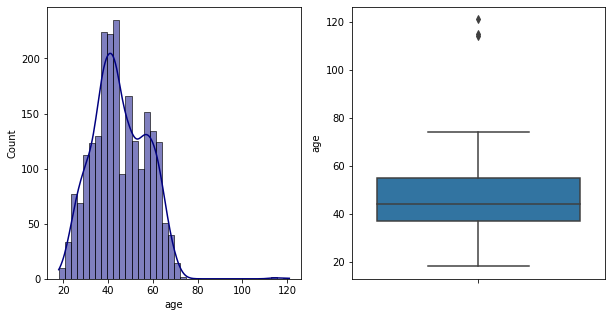

In [ ]:
# Analysing the effect of age
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
sns.histplot(ax=axes[0], x = "age", color = 'navy', kde = True, data = raw_df)
sns.boxplot(ax=axes[1], y = "age", data=raw_df)

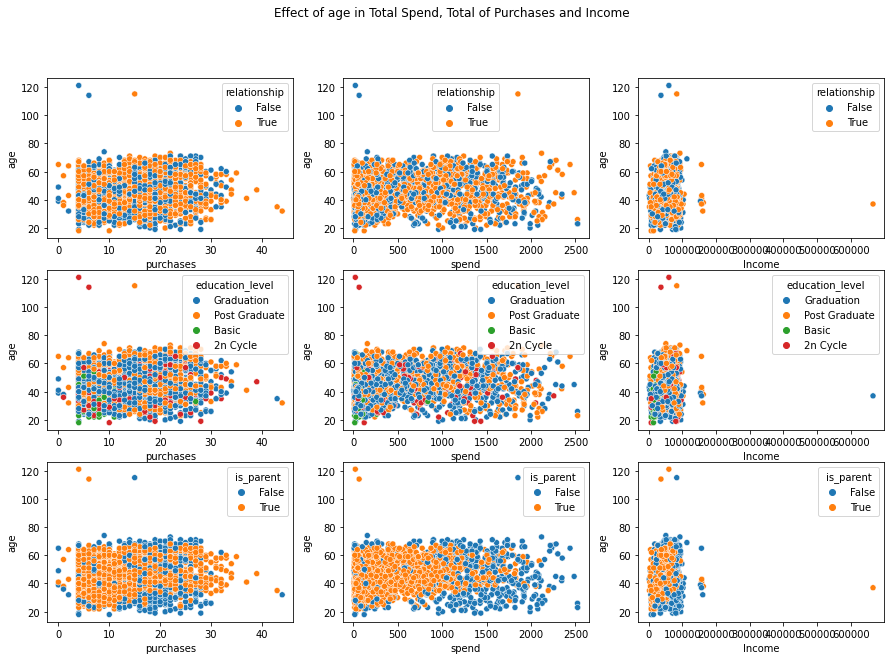

In [ ]:
fig, axes = plt.subplots(3, 3, figsize=(15, 10))
fig.suptitle('Effect of age in Total Spend, Total of Purchases and Income')

sns.scatterplot(ax=axes[0,0], x="purchases", y="age", hue='relationship', data=raw_df)
sns.scatterplot(ax=axes[0,1], x="spend", y="age", hue='relationship', data=raw_df)
sns.scatterplot(ax=axes[0,2], x="Income", y="age", hue='relationship', data=raw_df)
sns.scatterplot(ax=axes[1,0], x="purchases", y="age", hue='education_level', data=raw_df)
sns.scatterplot(ax=axes[1,1], x="spend", y="age", hue='education_level', data=raw_df)
sns.scatterplot(ax=axes[1,2], x="Income", y="age", hue='education_level', data=raw_df)
sns.scatterplot(ax=axes[2,0], x="purchases", y="age", hue='is_parent', data=raw_df)
sns.scatterplot(ax=axes[2,1], x="spend", y="age", hue='is_parent', data=raw_df)
sns.scatterplot(ax=axes[2,2], x="Income", y="age", hue='is_parent', data=raw_df)

Most consumers are between 20 and 80 years old, which remains consistent across all charts, so we can drop customers aged under 18 (the legal age for entry into the financial system) and over 80 (considering that the maximum year for age was 2014, in 2021, consumers above this range would be over 100 years old).

The relationship type and education level not affect any variable.

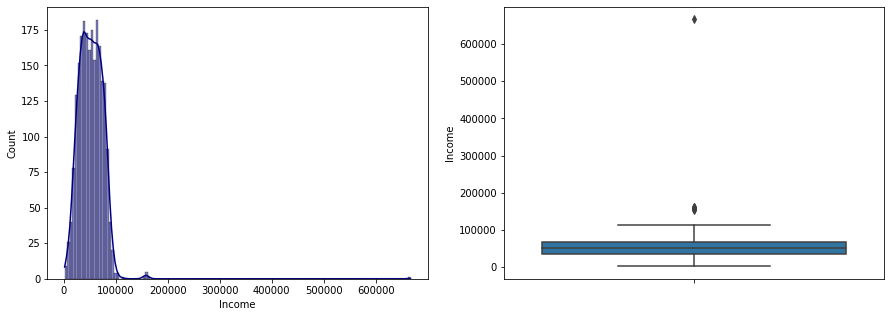

In [ ]:
# Analysing the effect of Income
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
sns.histplot(ax=axes[0], x = "Income", color = 'navy', kde = True, data = raw_df)
sns.boxplot(ax=axes[1], y = "Income", data=raw_df)

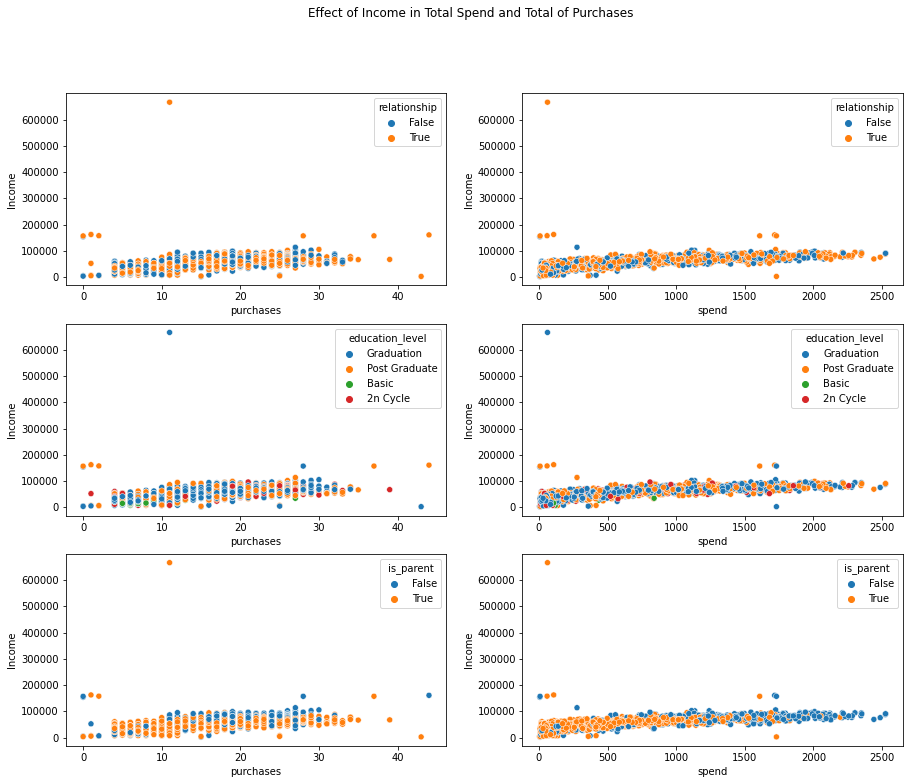

In [ ]:
fig, axes = plt.subplots(3, 2, figsize=(15, 12))
fig.suptitle('Effect of Income in Total Spend and Total of Purchases')

sns.scatterplot(ax=axes[0,0], x="purchases", y="Income", hue='relationship', data=raw_df)
sns.scatterplot(ax=axes[0,1], x="spend", y="Income", hue='relationship', data=raw_df)
sns.scatterplot(ax=axes[1,0], x="purchases", y="Income", hue='education_level', data=raw_df)
sns.scatterplot(ax=axes[1,1], x="spend", y="Income", hue='education_level', data=raw_df)
sns.scatterplot(ax=axes[2,0], x="purchases", y="Income", hue='is_parent', data=raw_df)
sns.scatterplot(ax=axes[2,1], x="spend", y="Income", hue='is_parent', data=raw_df)

The customer that are not parents spend more and have higher income, but not purchase more items, what sugest that they buy more expensive products. Besides we can see that the most of customers have income between 0 and 100000, which remains consistent across the three charts, so we considerer customers with grether income values as outliers.

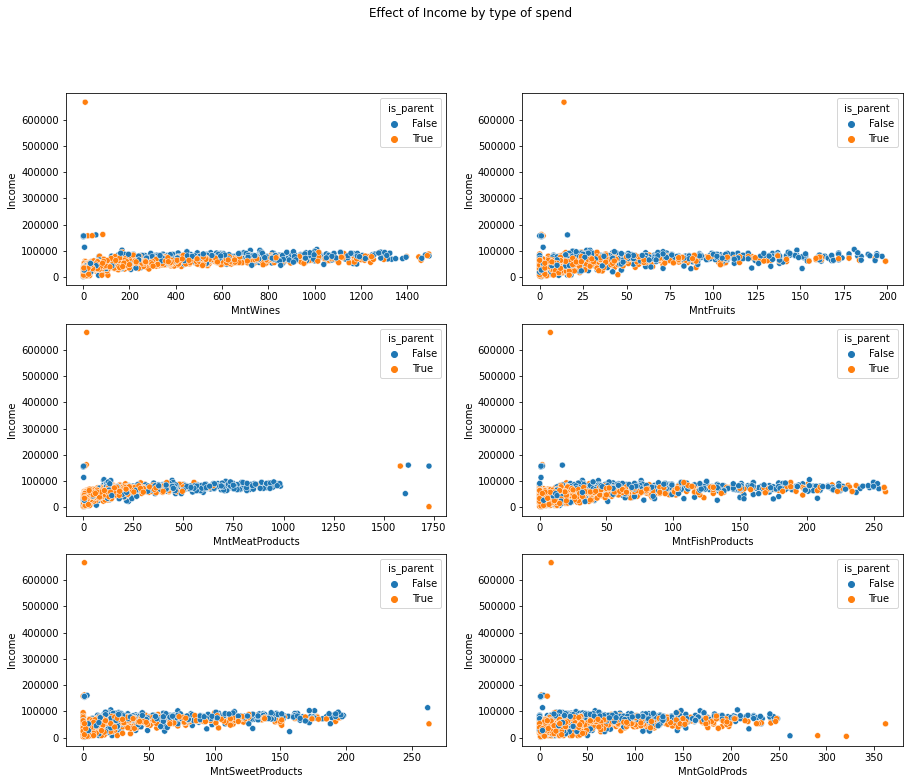

In [ ]:
# Analysin the effect of Income and Parenting by type of spend

fig, axes = plt.subplots(3, 2, figsize=(15, 12))
fig.suptitle('Effect of Income by type of spend')

sns.scatterplot(ax=axes[0,0], x="MntWines", y="Income", hue="is_parent", data=raw_df)
sns.scatterplot(ax=axes[0,1], x="MntFruits", y="Income", hue="is_parent", data=raw_df)
sns.scatterplot(ax=axes[1,0], x="MntMeatProducts", y="Income", hue="is_parent", data=raw_df)
sns.scatterplot(ax=axes[1,1], x="MntFishProducts", y="Income", hue="is_parent", data=raw_df)
sns.scatterplot(ax=axes[2,0], x="MntSweetProducts", y="Income", hue="is_parent", data=raw_df)
sns.scatterplot(ax=axes[2,1], x="MntGoldProds", y="Income", hue="is_parent", data=raw_df)

Customers that are not parents spend in all itens, but they prevail in wine and meat products, where they spend about 4 times more than in the other categories.

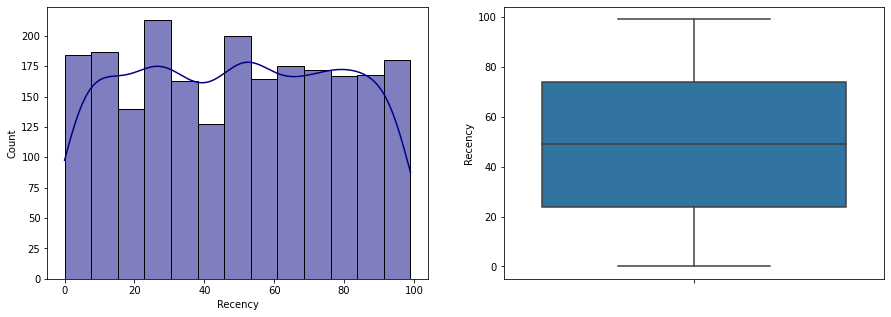

In [ ]:
# Analysing the effect of Recency
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
sns.histplot(ax=axes[0], x = "Recency", color = 'navy', kde = True, data = raw_df)
sns.boxplot(ax=axes[1], y = "Recency", data=raw_df)

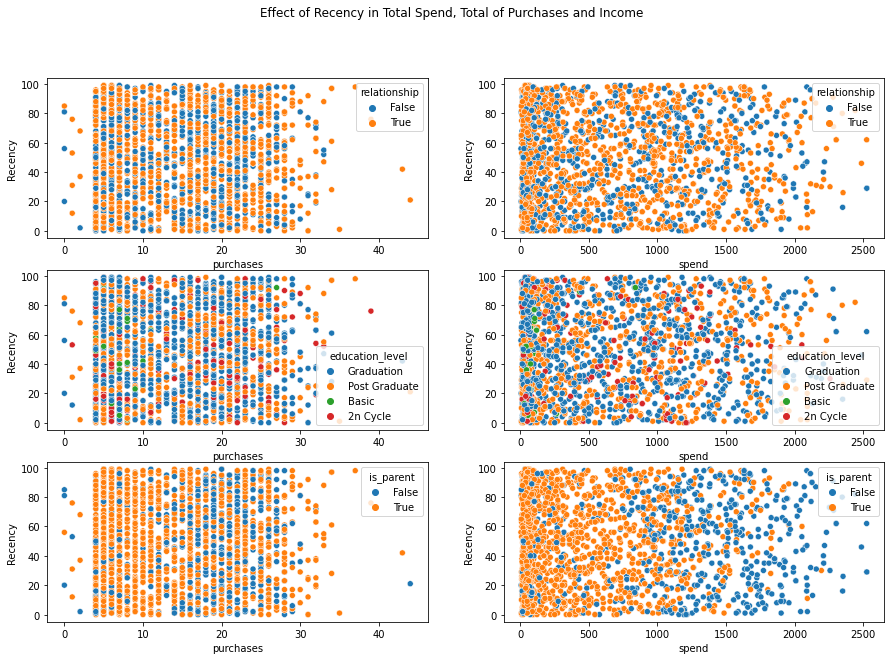

In [ ]:
fig, axes = plt.subplots(3, 2, figsize=(15, 10))
fig.suptitle('Effect of Recency in Total Spend, Total of Purchases and Income')

sns.scatterplot(ax=axes[0,0], x="purchases", y="Recency", hue='relationship', data=raw_df)
sns.scatterplot(ax=axes[0,1], x="spend", y="Recency", hue='relationship', data=raw_df)
sns.scatterplot(ax=axes[1,0], x="purchases", y="Recency", hue='education_level', data=raw_df)
sns.scatterplot(ax=axes[1,1], x="spend", y="Recency", hue='education_level', data=raw_df)
sns.scatterplot(ax=axes[2,0], x="purchases", y="Recency", hue='is_parent', data=raw_df)
sns.scatterplot(ax=axes[2,1], x="spend", y="Recency", hue='is_parent', data=raw_df)

The number days since the last purchase appears to be having a uniform distribution, so we not will find any specific factor to the analyses, so we can drop this variable.

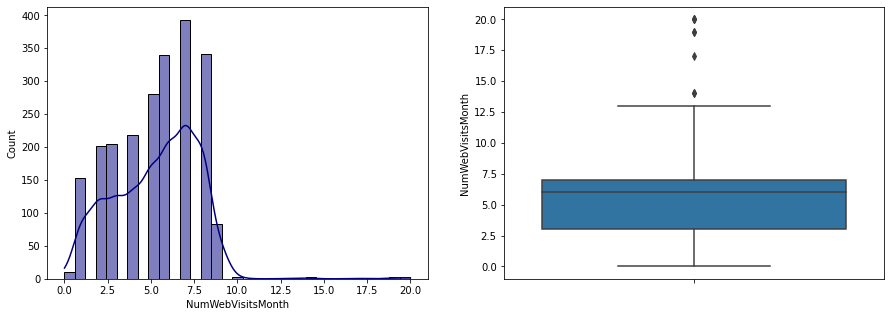

In [ ]:
# Analysing the number of visits to company's web site in the last month
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
sns.histplot(ax=axes[0], x = "NumWebVisitsMonth", color = 'navy', kde = True, data = raw_df)
sns.boxplot(ax=axes[1], y = "NumWebVisitsMonth", data=raw_df)

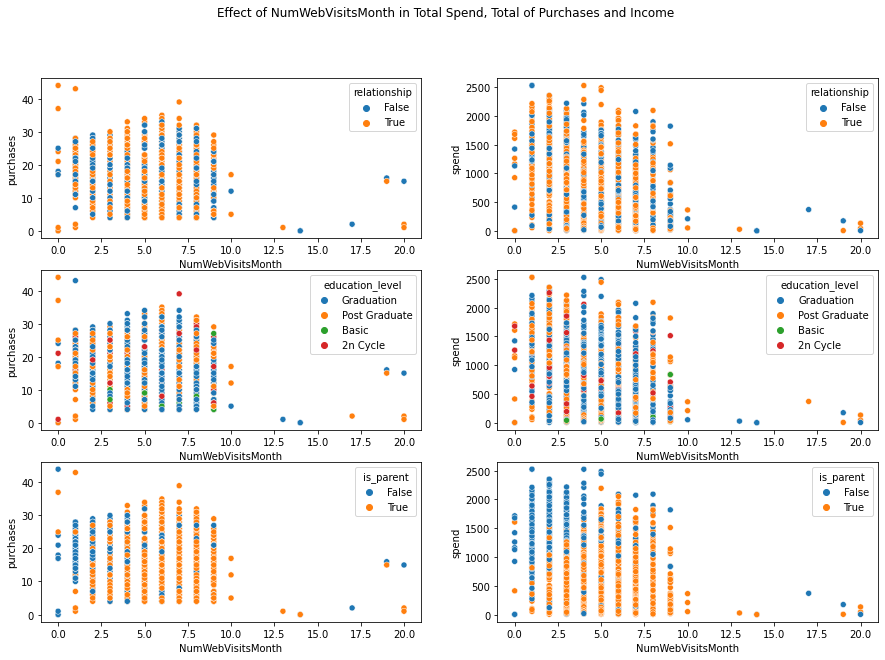

In [ ]:
fig, axes = plt.subplots(3, 2, figsize=(15, 10))
fig.suptitle('Effect of NumWebVisitsMonth in Total Spend, Total of Purchases and Income')

sns.scatterplot(ax=axes[0,0], x="NumWebVisitsMonth", y="purchases", hue='relationship', data=raw_df)
sns.scatterplot(ax=axes[0,1], x="NumWebVisitsMonth", y="spend", hue='relationship', data=raw_df)
sns.scatterplot(ax=axes[1,0], x="NumWebVisitsMonth", y="purchases", hue='education_level', data=raw_df)
sns.scatterplot(ax=axes[1,1], x="NumWebVisitsMonth", y="spend", hue='education_level', data=raw_df)
sns.scatterplot(ax=axes[2,0], x="NumWebVisitsMonth", y="purchases", hue='is_parent', data=raw_df)
sns.scatterplot(ax=axes[2,1], x="NumWebVisitsMonth", y="spend", hue='is_parent', data=raw_df)

The values of NumWebVisitsMonth are very consistent and not affect the analysis, so we can drop this feature.

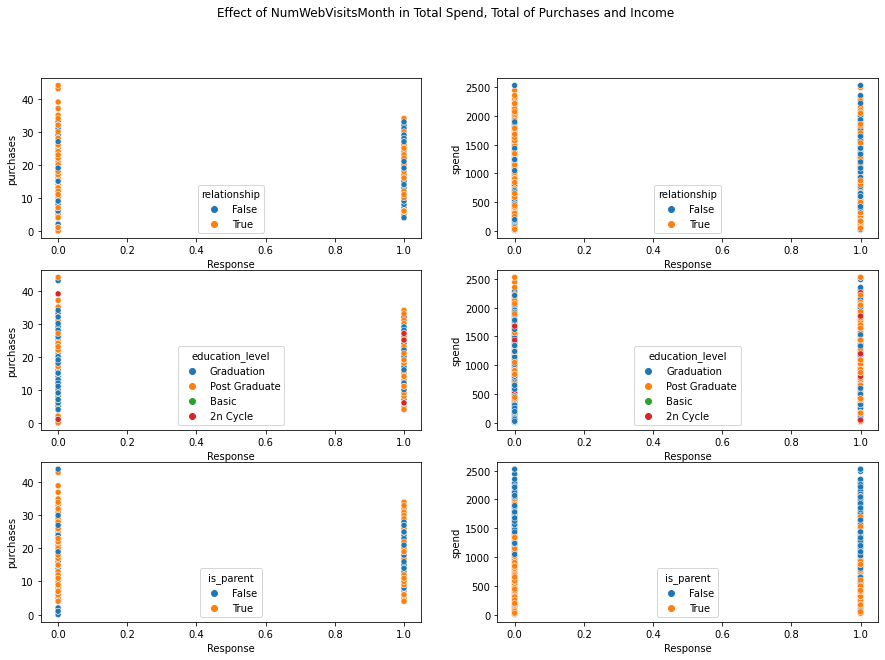

In [ ]:
# Analysing the effect of Response
fig, axes = plt.subplots(3, 2, figsize=(15, 10))
fig.suptitle('Effect of NumWebVisitsMonth in Total Spend, Total of Purchases and Income')

sns.scatterplot(ax=axes[0,0], x="Response", y="purchases", hue='relationship', data=raw_df)
sns.scatterplot(ax=axes[0,1], x="Response", y="spend", hue='relationship', data=raw_df)
sns.scatterplot(ax=axes[1,0], x="Response", y="purchases", hue='education_level', data=raw_df)
sns.scatterplot(ax=axes[1,1], x="Response", y="spend", hue='education_level', data=raw_df)
sns.scatterplot(ax=axes[2,0], x="Response", y="purchases", hue='is_parent', data=raw_df)
sns.scatterplot(ax=axes[2,1], x="Response", y="spend", hue='is_parent', data=raw_df)

The values of Response are very consistent and not affect the analysis, so we can drop this feature.

In [ ]:
raw_df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'relationship', 'education_level', 'is_parent', 'purchases', 'spend',
       'age'],
      dtype='object')

In [ ]:
# Drop the unecessary features
raw_df = raw_df.drop('Z_CostContact', axis=1)
raw_df = raw_df.drop('Z_Revenue', axis=1)
raw_df = raw_df.drop('AcceptedCmp1', axis=1)
raw_df = raw_df.drop('AcceptedCmp2', axis=1)
raw_df = raw_df.drop('AcceptedCmp3', axis=1)
raw_df = raw_df.drop('AcceptedCmp4', axis=1)
raw_df = raw_df.drop('AcceptedCmp5', axis=1)
raw_df = raw_df.drop('NumDealsPurchases', axis=1)
raw_df = raw_df.drop('NumWebPurchases', axis=1)
raw_df = raw_df.drop('NumCatalogPurchases', axis=1)
raw_df = raw_df.drop('NumStorePurchases', axis=1)
raw_df = raw_df.drop('Recency', axis=1)
raw_df = raw_df.drop('NumWebVisitsMonth', axis=1)
raw_df = raw_df.drop('Complain', axis=1)
raw_df = raw_df.drop('Education', axis=1)
raw_df = raw_df.drop('Marital_Status', axis=1)
raw_df = raw_df.drop('ID', axis=1)
raw_df = raw_df.drop('Year_Birth', axis=1)
raw_df = raw_df.drop('Kidhome', axis=1)
raw_df = raw_df.drop('Teenhome', axis=1)
raw_df = raw_df.drop('Dt_Customer', axis=1)
raw_df = raw_df.drop('Response', axis=1)
raw_df = raw_df.drop('relationship', axis=1)
raw_df = raw_df.drop('education_level', axis=1)
raw_df = raw_df.drop('purchases', axis=1)
raw_df = raw_df.drop('spend', axis=1)
raw_df

,Income,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,is_parent,age
0,58138.0,635,88,546,172,88,88,False,57
1,46344.0,11,1,6,2,1,6,True,60
2,71613.0,426,49,127,111,21,42,False,49
3,26646.0,11,4,20,10,3,5,True,30
4,58293.0,173,43,118,46,27,15,True,33
...,...,...,...,...,...,...,...,...,...
2235,61223.0,709,43,182,42,118,247,True,47
2236,64014.0,406,0,30,0,0,8,True,68
2237,56981.0,908,48,217,32,12,24,False,33
2238,69245.0,428,30,214,80,30,61,True,58


In [ ]:
# Removing the outliers
raw_df = raw_df[raw_df["Income"] < 100000]
raw_df = raw_df[raw_df["age"] < 80]
raw_df

,Income,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,is_parent,age
0,58138.0,635,88,546,172,88,88,False,57
1,46344.0,11,1,6,2,1,6,True,60
2,71613.0,426,49,127,111,21,42,False,49
3,26646.0,11,4,20,10,3,5,True,30
4,58293.0,173,43,118,46,27,15,True,33
...,...,...,...,...,...,...,...,...,...
2235,61223.0,709,43,182,42,118,247,True,47
2236,64014.0,406,0,30,0,0,8,True,68
2237,56981.0,908,48,217,32,12,24,False,33
2238,69245.0,428,30,214,80,30,61,True,58


# Clusterization with K-Means

In [ ]:
# K-Means works only with quantitative variables, so we need to drop the feature is_parent
raw_df = raw_df.drop('is_parent', axis=1)

range(2, 10)


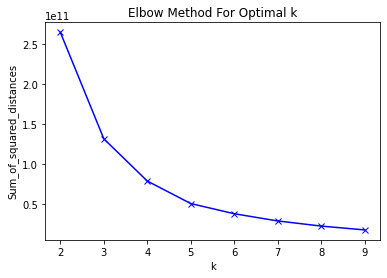

In [ ]:
# Elbow Criterion Method

X = raw_df

Sum_of_squared_distances = []
K = range(2,10)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(X)
    Sum_of_squared_distances.append(km.inertia_)
    

plt.plot(K, Sum_of_squared_distances, 'bx-')
print(K)
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

Bases on above plot we will segment the data in 3 clusters,

In [ ]:
# set number of clusters
kclusters = 3

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(X)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([1, 1, 0, 2, 1, 1, 1, 2, 2, 2], dtype=int32)

In [ ]:
# Let's create a new dataframe that includes the cluster as well as the top 10 venues for each district.

customers_seg = raw_df
customers_seg.insert(0, 'labels', kmeans.labels_)
customers_seg

,cluster,Income,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,age
0,1,58138.0,635,88,546,172,88,88,57
1,1,46344.0,11,1,6,2,1,6,60
2,0,71613.0,426,49,127,111,21,42,49
3,2,26646.0,11,4,20,10,3,5,30
4,1,58293.0,173,43,118,46,27,15,33
...,...,...,...,...,...,...,...,...,...
2235,1,61223.0,709,43,182,42,118,247,47
2236,0,64014.0,406,0,30,0,0,8,68
2237,1,56981.0,908,48,217,32,12,24,33
2238,0,69245.0,428,30,214,80,30,61,58


In [ ]:
# Examine clusters

# Cluster 1
cluster_1 = customers_seg.loc[customers_seg['cluster'] == 0]
cluster_1

,cluster,Income,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,age
2,0,71613.0,426,49,127,111,21,42,49
15,0,82800.0,1006,22,115,59,68,45,68
18,0,76995.0,1012,80,498,0,16,176,65
23,0,65324.0,384,0,102,21,32,5,60
29,0,84618.0,684,100,801,21,66,0,49
...,...,...,...,...,...,...,...,...,...
2217,0,82032.0,332,194,377,149,125,57,66
2221,0,75777.0,712,26,538,69,13,80,32
2226,0,63777.0,457,5,106,15,17,53,35
2236,0,64014.0,406,0,30,0,0,8,68


In [ ]:
cluster_1.describe()

,cluster,Income,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,age
count,711.0,711.000000,711.000000,711.000000,711.000000,711.000000,711.000000,711.000000,711.000000
mean,0.0,75290.552743,623.180028,56.420534,387.288326,81.406470,58.781997,70.632911,46.638537
std,0.0,7919.129228,319.697231,48.126436,237.639400,65.417226,50.161250,58.865940,12.517262
min,0.0,63516.000000,66.000000,0.000000,16.000000,0.000000,0.000000,0.000000,19.000000
25%,0.0,68695.000000,380.500000,20.000000,187.500000,28.500000,20.000000,27.000000,38.000000
50%,0.0,74538.000000,572.000000,40.000000,352.000000,65.000000,40.000000,52.000000,46.000000
75%,0.0,80842.000000,835.500000,82.500000,539.000000,124.500000,91.000000,101.000000,57.000000
max,0.0,98777.000000,1493.000000,197.000000,984.000000,258.000000,198.000000,249.000000,73.000000


In [ ]:
cluster_2.describe()

,cluster,Income,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,age
count,789.0,789.000000,789.000000,789.000000,789.000000,789.000000,789.000000,789.000000,789.000000
mean,1.0,51577.589395,269.273764,17.714829,93.718631,24.217997,17.346008,44.172370,47.703422
std,0.0,6826.537264,251.663977,30.539872,113.355789,39.817899,30.042156,49.425283,10.672478
min,1.0,39858.000000,2.000000,0.000000,1.000000,0.000000,0.000000,0.000000,22.000000
25%,1.0,45894.000000,68.000000,1.000000,24.000000,2.000000,0.000000,10.000000,39.000000
50%,1.0,51717.000000,194.000000,6.000000,61.000000,8.000000,6.000000,27.000000,47.000000
75%,1.0,57236.000000,387.000000,18.000000,124.000000,28.000000,19.000000,58.000000,57.000000
max,1.0,63404.000000,1241.000000,199.000000,1607.000000,259.000000,263.000000,362.000000,74.000000


In [ ]:
cluster_3.describe()

,cluster,Income,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,age
count,724.0,724.000000,724.000000,724.000000,724.000000,724.000000,724.000000,724.000000,724.000000
mean,2.0,28077.796961,29.861878,5.872928,25.305249,9.063536,6.022099,17.502762,40.792818
std,0.0,8336.985805,44.278450,11.690115,70.397779,18.728204,11.702138,28.642283,10.717995
min,2.0,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000
25%,2.0,22582.250000,5.000000,1.000000,7.000000,2.000000,1.000000,4.000000,33.000000
50%,2.0,29672.000000,14.000000,3.000000,13.000000,4.000000,3.000000,10.000000,40.000000
75%,2.0,34920.750000,32.000000,6.000000,24.000000,10.000000,7.000000,20.000000,47.000000
max,2.0,39791.000000,284.000000,151.000000,1725.000000,208.000000,157.000000,321.000000,68.000000
